In [83]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [84]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# hacks
import os
import sys
nb_dir = os.path.join( os.path.split(os.path.abspath(os.getcwd()))[0], 'python' )
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [86]:
import File

In [87]:
Re = 6378100. # radius of Earth [meters]
m_per_AU = 149597870700. # unit conversion [meters / astronomical unit]
earth_pos = [1,0,0] # [AU]

In [10]:
Z92_E2_R5 = File.read('THETAX_005/Z92_E002e18_PHIX000_R5.0.dat')
Z1_E2_R5 = File.read('THETAX_005/Z92_E002e18_PHIX000_R5.0.pdat')

In [11]:
print Z92_E2_R5['earth_dist'] # [Re]
print Z1_E2_R5['earth_dist']  # [Re]
print abs(Z92_E2_R5['earth_dist'] - Z1_E2_R5['earth_dist']) * Re / 1000. # [km]

0.0196229485609
0.0504720558225
196.758691025


In [12]:
Z92pos = (Z92_E2_R5['last_pos'] - earth_pos) * m_per_AU / 1000. # [km]
Z1pos  = ( Z1_E2_R5['last_pos'] - earth_pos) * m_per_AU / 1000. # [km]
diff = Z92pos - Z1pos
print np.sqrt( np.dot(diff, diff) )

202.365298448


In [88]:
def planar_coordinates(TX, Zparent, E, PX, R, proton=False):
    # check for THETAX directory
    if not os.path.exists( os.path.join(os.curdir, 'THETAX_{:03}'.format(TX)) ):
        print 'incorrect THETAX value, please select from: ',
        print [x.strip('THETAX_') for x in os.listdir(os.curdir) if x.find('THETAX') == 0]
        sys.exit(1)
        
    # proton or nucleus    
    ext = '.dat'
    if proton:
        ext = '.pdat'
    
    # find the file or complain
    dirname  = os.path.join( os.curdir, 'THETAX_{:03}'.format(TX) )
    filename = 'Z{:02}_E{:03.0f}e18_PHIX{:03.0f}_R{:2.1f}'.format(Zparent, E, PX, R) + ext
    filepath = os.path.join(dirname, filename)
    if not os.path.exists(filepath):
        dick = {'Zparent':[], 'E':[], 'PX':[], 'R':[]}
        for token in tokens:
            dick[ 'Zparent'].append(int(token[0].strip('Z0')))
            dick[ 'E'].append(int(token[1].strip('E0').strip('e18')))
            dick['PX'].append(int(token[3]))
            dick[ 'R'].append(float(token[4].strip('R')))
        print 'incorrect value(s), please select from: TX, Zparent, E, PX, R, proton=False(default)'
        print '\t TX = {}'.format(TX)
        for key in dick.keys():
            tag = ''
            if key == 'E':
                tag = 'e18'
            shortlist = sorted( list(set( dick[key] )) )
            print '\t ' + key + ' = {}'.format(shortlist) + tag
        sys.exit(1)

    # fetch from file
    earth_pos = [1,0,0]
    return ( File.read(filepath)['last_pos'] - earth_pos ) * m_per_AU / 1000. # [km]

In [92]:
print planar_coordinates(5,92,2,0,5, proton=False)
print planar_coordinates(5,92,2,0,5, proton=True)

[ -5.65407357e+01   1.11657745e+02  -2.10550934e-11]
[ -7.41778542e+01   3.13252998e+02  -5.47451375e-11]


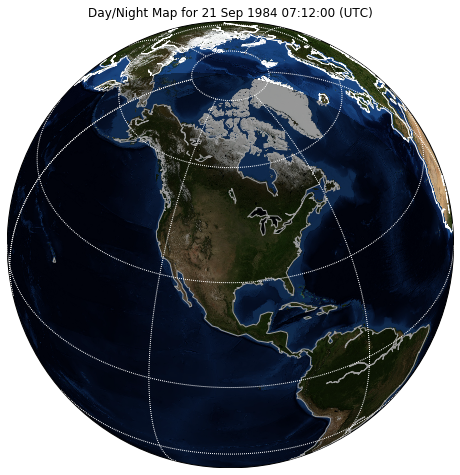

In [91]:
fig = plt.figure(figsize=(8, 8))
# miller projection
map = Basemap(projection='ortho',lat_0=39.8283, lon_0=-98.5795)
# plot coastlines, draw label meridians and parallels.
map.drawparallels(np.arange(-90,90,30),color='w')
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),color='w')
#map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
#map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.bluemarble()
map.drawcoastlines(color='w')
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
#date = datetime.utcnow()
#birthday
date = datetime(1984, 9, 20, 23, 19, 0, 0, pytz.timezone('US/Pacific'))
date = date.astimezone(pytz.timezone('UTC'))
CS=map.nightshade(date, alpha=0.4)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

In [118]:
def surface_coordinates(TX, Zparent, E, PX, R, proton=False):
    # check for THETAX directory
    if not os.path.exists( os.path.join(os.curdir, 'THETAX_{:03}'.format(TX)) ):
        print 'incorrect THETAX value, please select from: ',
        print [x.strip('THETAX_') for x in os.listdir(os.curdir) if x.find('THETAX') == 0]
        sys.exit(1)
        
    # proton or nucleus    
    ext = '.dat'
    if proton:
        ext = '.pdat'
    
    # find the file or complain
    dirname  = os.path.join( os.curdir, 'THETAX_{:03}'.format(TX) )
    filename = 'Z{:02}_E{:03.0f}e18_PHIX{:03.0f}_R{:2.1f}'.format(Zparent, E, PX, R) + ext
    filepath = os.path.join(dirname, filename)
    if not os.path.exists(filepath):
        dick = {'Zparent':[], 'E':[], 'PX':[], 'R':[]}
        for token in tokens:
            dick[ 'Zparent'].append(int(token[0].strip('Z0')))
            dick[ 'E'].append(int(token[1].strip('E0').strip('e18')))
            dick['PX'].append(int(token[3]))
            dick[ 'R'].append(float(token[4].strip('R')))
        print 'incorrect value(s), please select from: TX, Zparent, E, PX, R, proton=False(default)'
        print '\t TX = {}'.format(TX)
        for key in dick.keys():
            tag = ''
            if key == 'E':
                tag = 'e18'
            shortlist = sorted( list(set( dick[key] )) )
            print '\t ' + key + ' = {}'.format(shortlist) + tag
        sys.exit(1)

    # fetch from file
    earth_pos = [1,0,0]
    x = ( File.read(filepath)['last_pos'] - earth_pos ) * m_per_AU
    n_hat = np.array([ np.cos(TX), np.sin(TX) * np.cos(PX), np.sin(TX) * np.sin(PX) ])
    nx = np.dot(n_hat, x)
    s = np.sqrt( Re**2 + nx**2 - np.dot(x,x) ) - nx

    return (x + s * n_hat) / 1000. # [km]

In [119]:
print surface_coordinates(5,92,2,0,5, proton=False)
print surface_coordinates(5,92,2,0,5, proton=True)

[  1.78759534e+03  -6.12247193e+03  -2.10550934e-11]
[  1.82621773e+03  -6.11106279e+03  -5.47451375e-11]


In [120]:
a = surface_coordinates(5,92,2,0,5, proton=False) * 1000.
b = surface_coordinates(5,92,2,0,5, proton=True) * 1000.
print np.sqrt( np.dot(a,a) ) / Re
print np.sqrt( np.dot(b,b) ) / Re

1.0
1.0


In [123]:
def latlon(position, lat_offset = 0., lon_offset = 0.):
    pos = np.array(position)
    p_hat = pos / np.sqrt( np.dot(pos, pos) )
    lat = np.arcsin(p_hat[2]) * 180. / np.pi
    lon = np.arctan2(p_hat[1], p_hat[0]) * 180. / np.pi
    return np.array([lat + lat_offset, lon + lon_offset])

In [124]:
print latlon(surface_coordinates(5,92,2,0,5, proton=False))
print latlon(surface_coordinates(5,92,2,0,5, proton=True))

[ -1.89142219e-13  -7.37236310e+01]
[ -4.91786790e-13  -7.33618562e+01]
